In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

# Arranging dataset

In [9]:
BATCH_SIZE=32
IMAGE_SIZE=256
CHANNELS=3
EPOCHS=50

In [10]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
       "/content/drive/MyDrive/Oncoknow/Cancer /Cancer_Dataset",
       shuffle = True,
       image_size = (IMAGE_SIZE,IMAGE_SIZE),
       batch_size = BATCH_SIZE

)

Found 3316 files belonging to 2 classes.


In [11]:
class_names = dataset.class_names
class_names

['CLL case lymphocytes', 'Normal lymphocytes']

#Exploring data

In [12]:
 for image_batch,labels_batch in dataset.take(1):
        print(image_batch.shape)
        print(labels_batch.numpy())

(32, 256, 256, 3)
[0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0]


# visualizing images

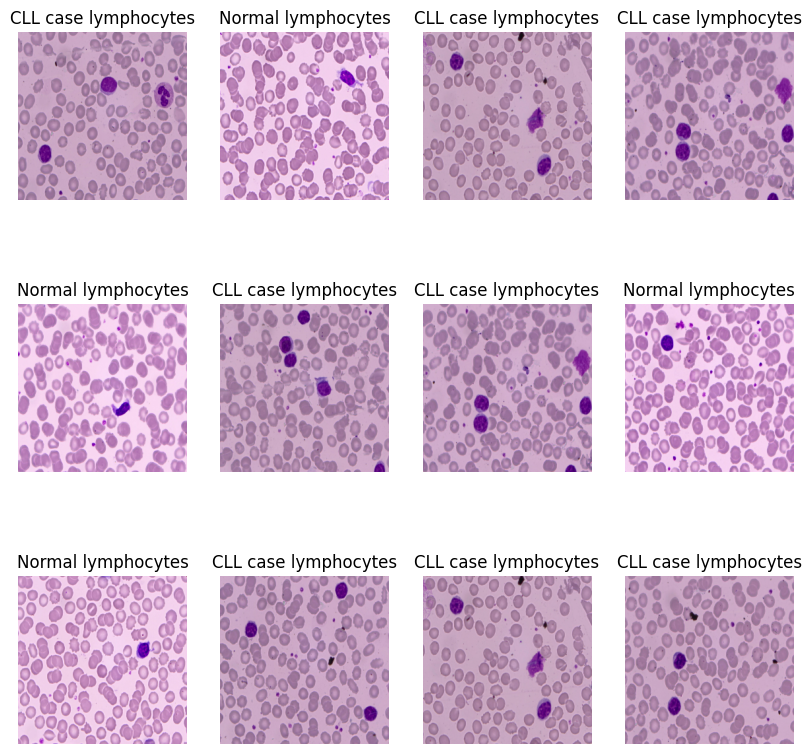

In [13]:
plt.figure(figsize=(10,10))
for i in range(12):
    ax = plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[labels_batch[i]])
    plt.axis("off")

# Train Test Split (spliting data)

In [14]:
"""80% ==> Training
20% ==> Test
      10% ==> Validation
      10% ==> Test
      """

'80% ==> Training\n20% ==> Test\n      10% ==> Validation\n      10% ==> Test\n      '

In [15]:
train_size = 0.8
len(dataset)*train_size

83.2

In [16]:
train_ds=dataset.take(83)
len(train_ds)

83

In [17]:
test_ds=dataset.skip(83)
len(test_ds)

21

In [18]:
val_size = 0.1
len(dataset)*val_size

10.4

In [19]:
val_ds=test_ds.take(10)
len(val_ds)

10

In [20]:
test_ds=test_ds.skip(10)
len(test_ds)

11

# Data Augmentation

In [21]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
# converting image into numpy array
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.8050965  0.670576   0.7800199 ]
  [0.7988128  0.6654795  0.7713618 ]
  [0.8039216  0.6666667  0.78431374]
  ...
  [0.5674403  0.41687346 0.5882353 ]
  [0.56386185 0.41876382 0.58192253]
  [0.56078434 0.41568628 0.58431375]]

 [[0.80615807 0.6689032  0.7865502 ]
  [0.8049511  0.6676962  0.7853432 ]
  [0.811236   0.67398113 0.7916282 ]
  ...
  [0.56078434 0.4117647  0.57254905]
  [0.5673898  0.41444865 0.5869976 ]
  [0.571224   0.41828278 0.5908318 ]]

 [[0.8042509  0.6709176  0.7767999 ]
  [0.80927527 0.6720204  0.7896674 ]
  [0.80784315 0.67058825 0.7882353 ]
  ...
  [0.55876994 0.42151502 0.5862209 ]
  [0.56346506 0.42621017 0.5830729 ]
  [0.5765855  0.43933058 0.5961933 ]]

 ...

 [[0.7998928  0.6765242  0.7842065 ]
  [0.79607844 0.6666667  0.78039217]
  [0.8039216  0.6666667  0.7921569 ]
  ...
  [0.8343526  0.67602664 0.77943563]
  [0.8019072  0.68290424 0.79677576]
  [0.8115426  0.678102   0.80168504]]

 [[0.8032016  0.6748698  0.78039217]
  [0.79773283 0.6683211  0.78204656]


In [23]:
# image normalization and scalling of image.
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [24]:
# image normalization and scalling of image
data_augmentation= tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

# Model Building

# Build and train a CNN model

In [25]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2

model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,kernel_size=(4,4),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(4,4),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),

])
model.build(input_shape=input_shape)


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 253, 253, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (32, 126, 126, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 123, 123, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 61, 61, 64)          0         
 g2D)                                                 

In [27]:
# model compilation
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [ ]:
history= model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50


# Plot training history on graph

In [ ]:
len(test_ds)

In [ ]:
scores = model.evaluate(test_ds)

In [ ]:
scores

In [ ]:
history.history.keys()

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss,label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Pridiction on sample image

In [ ]:
import numpy as np
for image_batch,labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual Label :",class_names[labels_batch[0].numpy()])

    batch_prediction = model.predict(image_batch)
    print("Predicted Label:",np.argmax(batch_prediction[0]))

# Creating a function to predict

In [ ]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0) # create a batch of images

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class,confidence = predict(model,images[i].numpy())

        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

#Saving model